# Confusion matrix

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [3]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, f1_score ,recall_score
from sklearn.model_selection import train_test_split

In [20]:
x = df.drop("target", axis=1)
y = df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()

clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

0.8688524590163934


In [22]:
y_preds = clf.predict(x_test)

In [23]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [24]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[24  5]
 [ 3 29]]


Text(50.722222222222214, 0.5, 'Predicted')

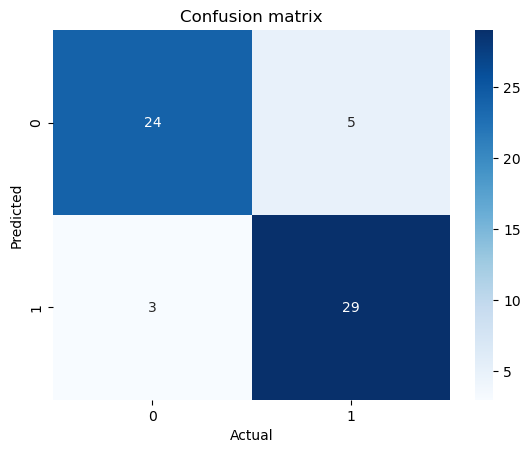

In [32]:
sns.heatmap(confusion_matrix(y_test, y_preds),
            annot=True, cmap="Blues")
plt.title("Confusion matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [33]:
# Precision
print(precision_score(y_test, y_preds))

0.8529411764705882


In [35]:
# F1 score
print(f1_score(y_test, y_preds))

0.8787878787878788


In [36]:
# Recall
print(recall_score(y_test, y_preds))

0.90625
